In [3]:
!git clone https://github.com/koreal6803/Stocker.git
#!pip install -r Stocker/requirements.txt
import warnings

### 去除煩人的 warrning
warnings.filterwarnings('ignore')
import pandas as pd

fatal: destination path 'Stocker' already exists and is not an empty directory.


In [4]:
### 讀入series
df = pd.read_csv('Stocker/price.csv', index_col='date', parse_dates=['date'])
price = df.squeeze()
price.head()
print(df)

             price
date              
2000-01-04   178.0
2000-01-05   182.0
2000-01-06   178.0
2000-01-07   173.0
2000-01-10   179.0
...            ...
2018-08-15   241.5
2018-08-16   239.0
2018-08-17   239.5
2018-08-20   239.5
2018-08-21   241.0

[4635 rows x 1 columns]


In [5]:
print(df.squeeze)

<bound method NDFrame.squeeze of              price
date              
2000-01-04   178.0
2000-01-05   182.0
2000-01-06   178.0
2000-01-07   173.0
2000-01-10   179.0
...            ...
2018-08-15   241.5
2018-08-16   239.0
2018-08-17   239.5
2018-08-20   239.5
2018-08-21   241.0

[4635 rows x 1 columns]>


In [6]:
from Stocker.stocker import Stocker

In [7]:
tsmc = Stocker(price)

the stock Stocker Initialized. Data covers 2000-01-04 00:00:00 to 2018-08-21 00:00:00.


Predicted Price on 2018-11-19 00:00:00 = $244.27


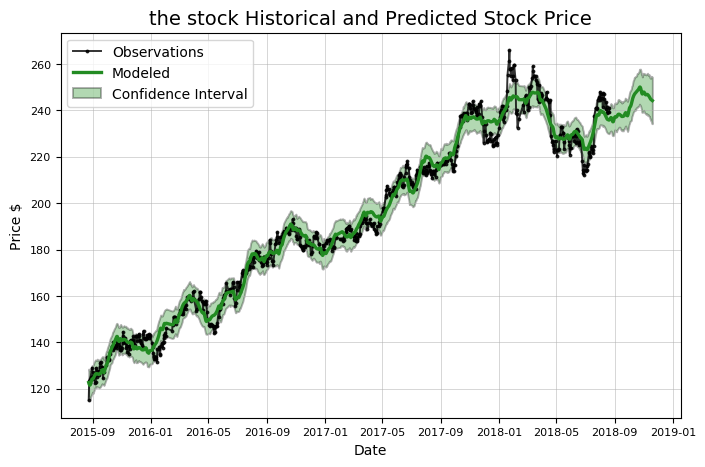

In [9]:
model, model_data = tsmc.create_prophet_model(days=90)


Prediction Range: 2017-08-21 00:00:00 to 2018-08-21 00:00:00.

Predicted price on 2018-08-18 00:00:00 = $255.67.
Actual price on    2018-08-17 00:00:00 = $239.50.

Average Absolute Error on Training Data = $2.68.
Average Absolute Error on Testing  Data = $14.82.

When the model predicted an increase, the price increased 47.02% of the time.
When the model predicted a  decrease, the price decreased  42.55% of the time.

The actual value was within the 80% confidence interval 79.27% of the time.


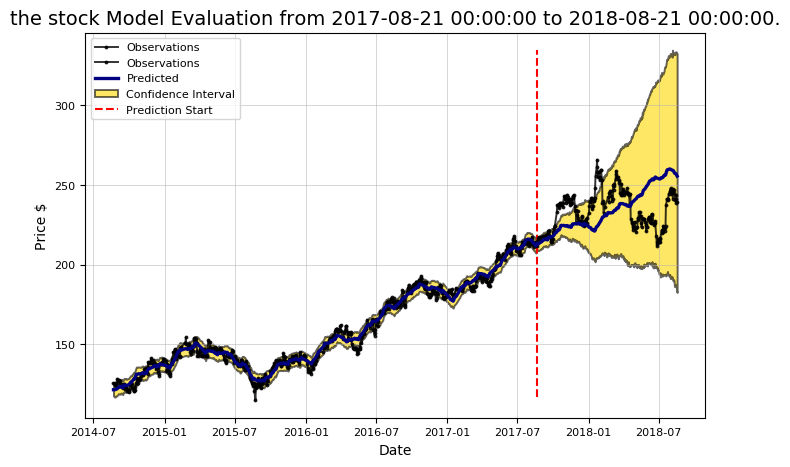

In [10]:
tsmc.evaluate_prediction()

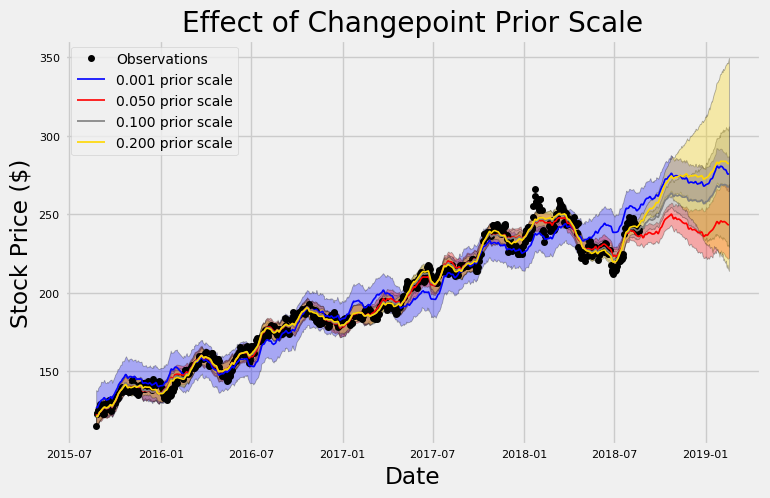

In [11]:
tsmc.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])


Predicted Increase: 

          Date    estimate    change       upper       lower
1   2018-08-22  244.358815  0.675830  248.964245  239.548896
2   2018-08-23  245.126068  0.767253  250.303531  240.095692
3   2018-08-24  245.769140  0.643072  250.674548  240.498545
5   2018-08-26  246.060750  0.291610  251.046270  241.103254
7   2018-08-28  246.018570  0.087564  250.880463  240.970932
..         ...         ...       ...         ...         ...
91  2018-11-20  274.938159  0.158556  295.860266  250.374974
92  2018-11-21  275.181080  0.242921  296.684628  250.518020
93  2018-11-22  275.520523  0.339443  298.770874  250.194432
94  2018-11-23  275.805845  0.285322  298.111007  250.856604
100 2018-11-29  273.875870  0.090161  298.500993  245.834683

[69 rows x 5 columns]

Predicted Decrease: 

         Date    estimate    change       upper       lower
6  2018-08-27  245.931006 -0.129744  250.627548  240.709676
23 2018-09-13  253.748359 -0.044341  259.095637  247.875804
24 2018-09-14  253.

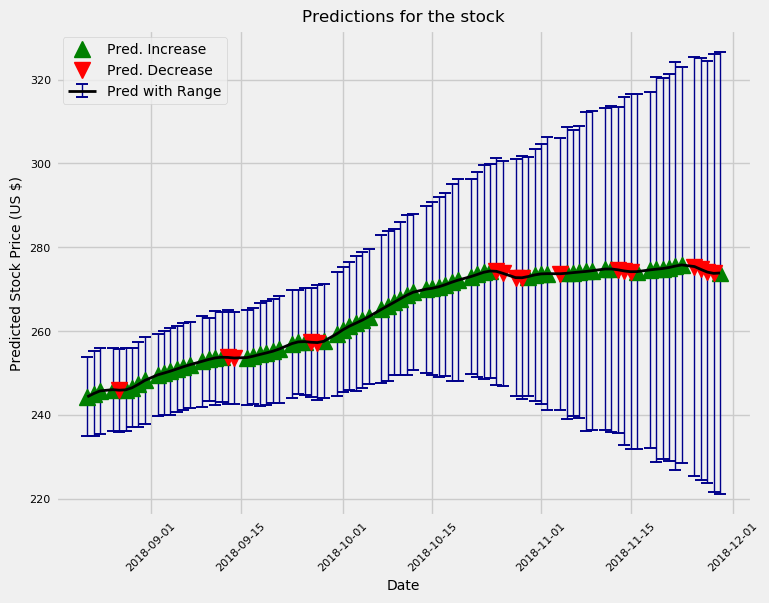

In [12]:
tsmc.predict_future(days=100)